In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
import re
# import gensim.parsing.preprocessing
from gensim.parsing.preprocessing import strip_punctuation, strip_tags, strip_numeric

In [4]:
#from gensim.parsing.preprocessing import strip_punctuation, strip_tags, strip_numeric
import nltk
from nltk.corpus import stopwords

In [5]:
df = pd.read_csv("uber_cleaned.csv")

In [6]:
df.head()

Unnamed: 0                           Title  Rating  \
0           0        Dishonest and Disgusting       1   
1           1                      Free offer       2   
2           2                      Inaccurate       2   
3           3                             sea       1   
4           4  Double charged me for an order       1   

                                              Review              Date  
0  For half an hour, we tried EVERY UBER SERVICE ...  29-12-2020 01:14  
1  If I’m not eligible for the offer Stop floodin...  01-01-2021 23:17  
2  Consistently inaccurate Uber Eats ETA and the ...  15-01-2021 23:38  
3  i had my rides canceled back to back. they the...  08-12-2020 01:01  
4  Two of the same orders was added by accident. ...  15-12-2020 04:02

In [7]:
# need to group based on rating review
# pre-process to remove punctuations, stop words
# create word-cloud

In [7]:
sw = stopwords.words("english")

In [8]:
def tokenize(text):
    filtered_tokens = []
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.lower() not in sw]
    
    for token in tokens:
        # keep only alphabets, remove punc, numerical, etc
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [15]:
## generates word cloud from data directly
def create_word_cloud(final_data, title ):
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200, 
                          mode='RGBA', background_color='white').generate(final_data)
    # plt the image generated by WordCloud class
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title, fontsize = 16)
    plt.show()

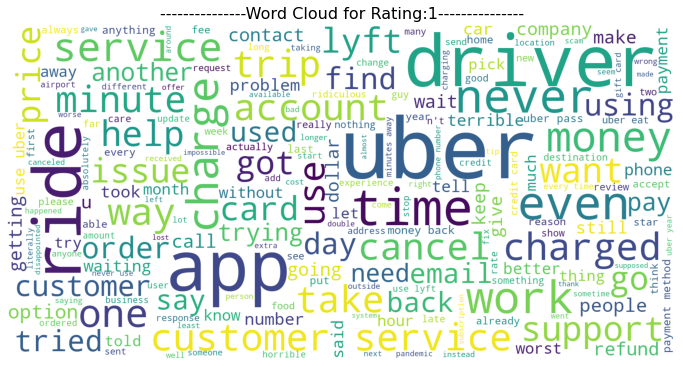

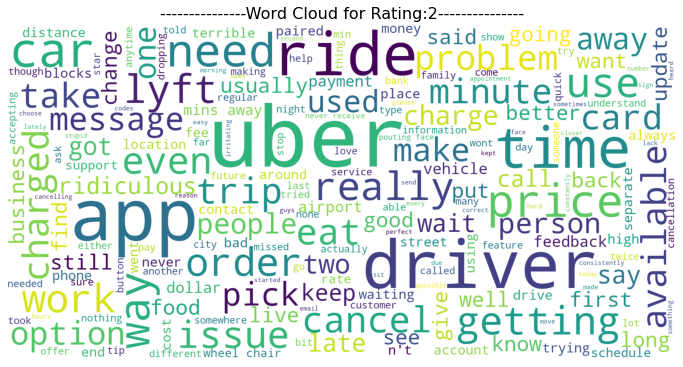

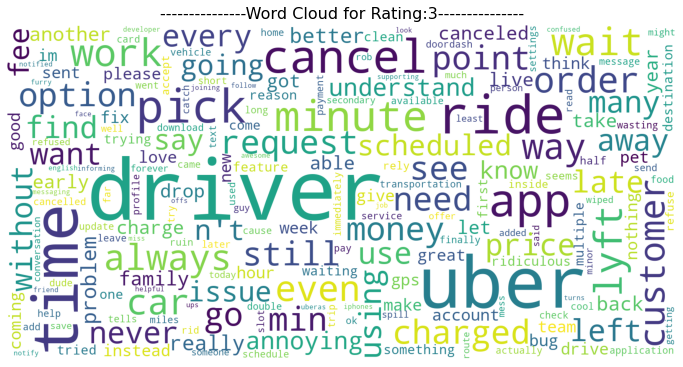

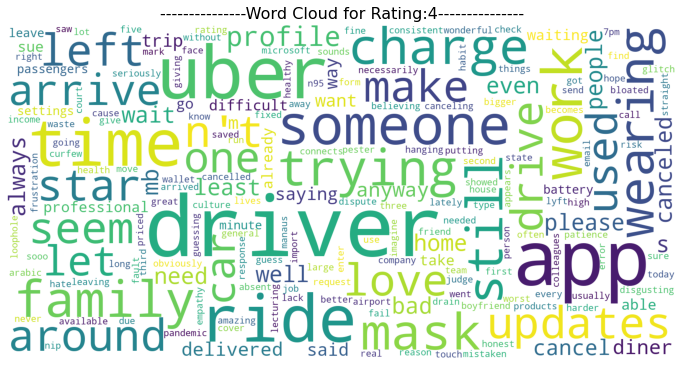

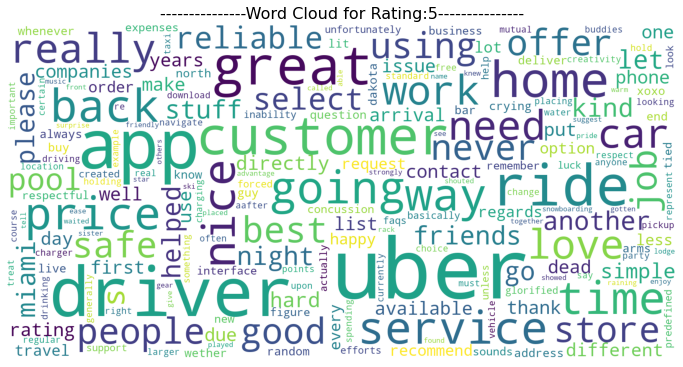

In [16]:
## generate word cloud 
for rating in df['Rating'].sort_values().unique():
    tokens = tokenize(" ".join(df.loc[df['Rating'] == rating, 'Review'].to_list()))
    title = f"---------------Word Cloud for Rating:{rating}---------------"
    create_word_cloud(' '.join(tokens), title)

In [17]:
## vectorizing to create word cloud

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# defining parms for the tf-df-tokenizer here
tfdf_vectorizer = TfidfVectorizer(
    max_df = 0.85,
#     min_df = ,
    max_features=200000,
    # stop_words=sw,
    use_idf=False, 
    tokenizer=tokenize,
    strip_accents = 'unicode',
    ngram_range=((1,3))
         )

# defining parms for the tf-idf-tokenizer here
tfidf_vectorizer = TfidfVectorizer(
    max_features=20000,
    max_df = 0.85,
#     min_df = 0.2,
    stop_words=sw,
    use_idf=True, 
    tokenizer=tokenize,
    strip_accents = 'unicode',
    ngram_range=((1,3))
         )

In [62]:
## get data frame of scores of reviews per rating . It can be unigram, bigram,trigram,... depending on parameter "n" value
def get_freq(n,df,colname=""):
    # defining parms for the tf-df-tokenizer here
    tfdf_vectorizer = TfidfVectorizer(
        max_df = 0.9,
    #     min_df = ,
        max_features=200000,
        stop_words=sw,
        use_idf=False, 
        tokenizer=tokenize,
        strip_accents = 'unicode',
        ngram_range=((n,n))
             )
    dic_of_df = {}
    for rating in df['Rating'].sort_values().unique():
        tfdf_matrix  = tfdf_vectorizer.fit_transform(df.loc[df['Rating'] == rating, 'Review'].to_list())
        
        df1 = pd.DataFrame(
            tfdf_matrix.todense().sum(axis=0), #sum along columns
            columns=tfdf_vectorizer.get_feature_names()
        ).T
        df1.sort_values(by=0,ascending=False,inplace=True)
        
        df1.reset_index(inplace=True,)
        df1.rename(columns={'index':colname,0:'TF_DF_Score'}, inplace=True)
        df1['rating'] = rating
        
        dic_of_df[rating] = df1[:20]
        
    
    return dic_of_df

In [66]:
# get bigram
dic_of_df_bigram = get_freq(2,df,colname="bigram")

df_bigram_tfdf = pd.concat(dic_of_df_bigram, ignore_index=True)

C:\Users\Siddharth Maheshwari\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [65]:
df_bigram_tfdf = pd.concat(dic_of_df, ignore_index=True)

In [67]:
# get trigram
dic_of_df_trigram = get_freq(3,df,colname="trigram")

df_trigram_tfdf = pd.concat(dic_of_df_trigram, ignore_index=True)

In [68]:
# get quadgram
dic_of_df_quadgram = get_freq(4,df,colname="quadgram")

df_quadgram_tfdf = pd.concat(dic_of_df_quadgram, ignore_index=True)

In [69]:
# get unigram
dic_of_df_unigram = get_freq(1,df,colname="unigram")

df_unigram_tfdf = pd.concat(dic_of_df_unigram, ignore_index=True)

In [70]:
df_trigram_tfdf.head()

trigram  TF_DF_Score  rating
0             want money back     1.371463       1
1             lyft way better     1.322254       1
2           face pouting face     1.140513       1
3             trying get ride     1.005479       1
4  scheduled rides unreliable     1.000000       1

In [71]:
df_quadgram_tfdf.head()

quadgram  TF_DF_Score  rating
0      worst app ever thieves     1.000000       1
1  matter app wants cooperate     1.000000       1
2   overpriced lyft way money     1.000000       1
3   pouting face pouting face     0.889541       1
4   face pouting face pouting     0.889541       1

In [72]:
df_bigram_tfdf.head()

bigram  TF_DF_Score  rating
0  customer service     8.267205       1
1          use uber     4.140726       1
2        money back     3.655405       1
3         uber pass     3.261661       1
4          get ride     3.186148       1

In [73]:
df_unigram_tfdf.head()

unigram  TF_DF_Score  rating
0    uber    54.426917       1
1     app    34.197419       1
2    ride    27.103312       1
3     get    20.213573       1
4  driver    17.690833       1

In [40]:
#list to hold the wordcloud object for each rating
tfdf_word_cloud = []
tfidf_word_cloud = []


## loop thru rating to create tdm for tfdf & tf-idf
# get weights sum for each term, create word cloud using the word-weight dict
for rating in df['Rating'].sort_values().unique():
    print(f"---------------Word Cloud for Rating:{rating}---------------")
    print(f"---------------Fitting Term Frequency Document Frequency---------------")
    tfdf_matrix = tfdf_vectorizer.fit_transform(df.loc[df['Rating'] == rating, 'Review'].to_list())
    tfdf_weights = [(word,tfdf_matrix.getcol(idx).sum()) for word, idx in tfdf_vectorizer.vocabulary_.items()]
    tfdf_word_cloud.append(
        WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=250,).fit_words(dict(tfdf_weights))
    )
    
    
    print(f"---------------Fitting Term Frequency Inverse Document Frequency---------------")
    tfidf_matrix = tfidf_vectorizer.fit_transform(df.loc[df['Rating'] == rating, 'Review'].to_list())
    tfidf_weights = [(word,tfidf_matrix.getcol(idx).sum()) for word, idx in tfidf_vectorizer.vocabulary_.items()]
    tfidf_word_cloud.append(
        WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=250,).fit_words(dict(tfidf_weights))
    )    

---------------Word Cloud for Rating:1---------------
---------------Fitting Term Frequency Document Frequency---------------
---------------Fitting Term Frequency Inverse Document Frequency---------------
---------------Word Cloud for Rating:2---------------
---------------Fitting Term Frequency Document Frequency---------------
---------------Fitting Term Frequency Inverse Document Frequency---------------
---------------Word Cloud for Rating:3---------------
---------------Fitting Term Frequency Document Frequency---------------
---------------Fitting Term Frequency Inverse Document Frequency---------------
---------------Word Cloud for Rating:4---------------
---------------Fitting Term Frequency Document Frequency---------------
---------------Fitting Term Frequency Inverse Document Frequency---------------
---------------Word Cloud for Rating:5---------------
---------------Fitting Term Frequency Document Frequency---------------
---------------Fitting Term Frequency Inverse Docu

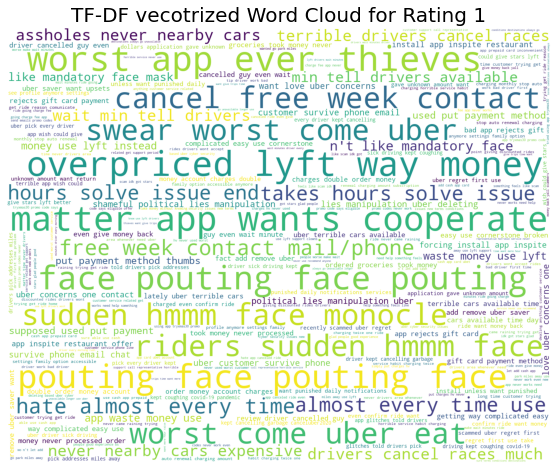

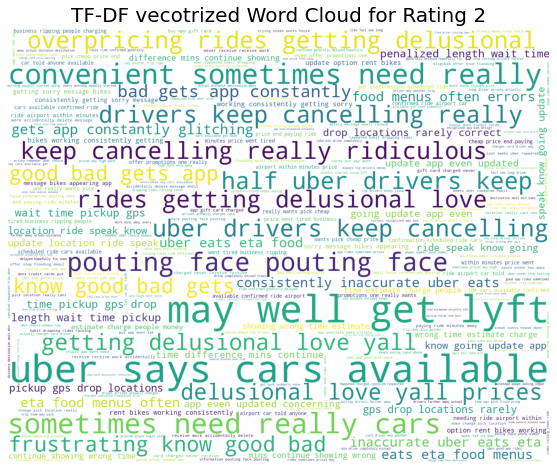

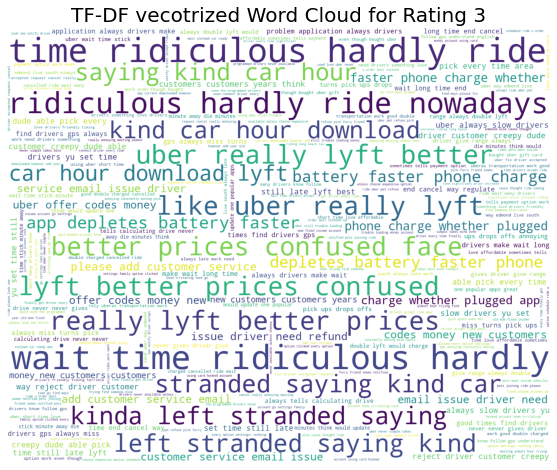

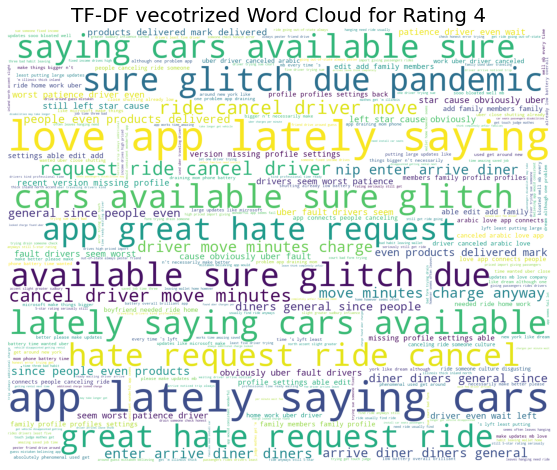

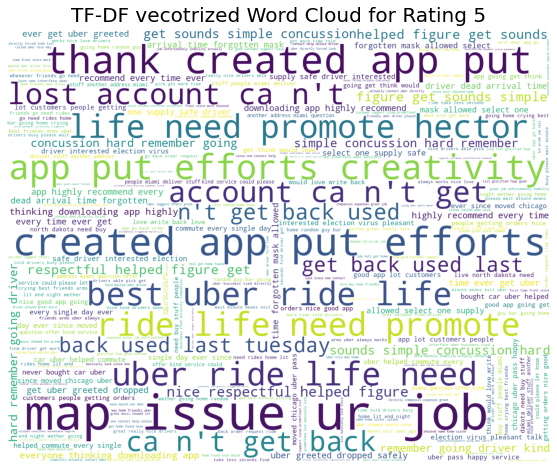

In [41]:
# show word cloud for each rating - tfdf 
for i in range(0,len(tfdf_word_cloud)):
    plt.figure(figsize=(12,8))
    plt.imshow(tfdf_word_cloud[i])
    plt.axis('off')
    plt.title(f"TF-DF vecotrized Word Cloud for Rating {i+1}",fontsize=20)
   

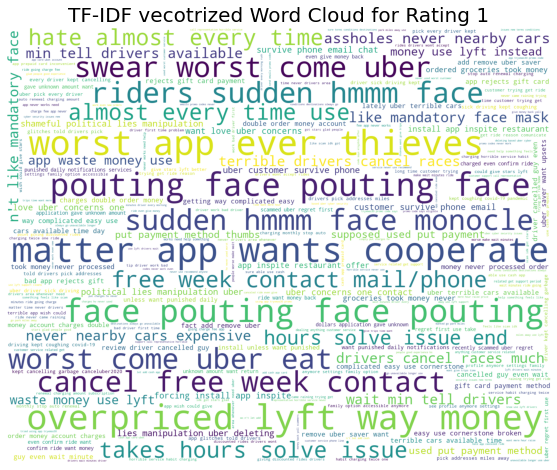

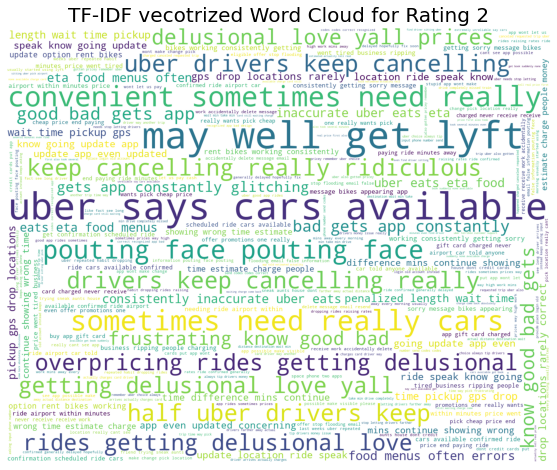

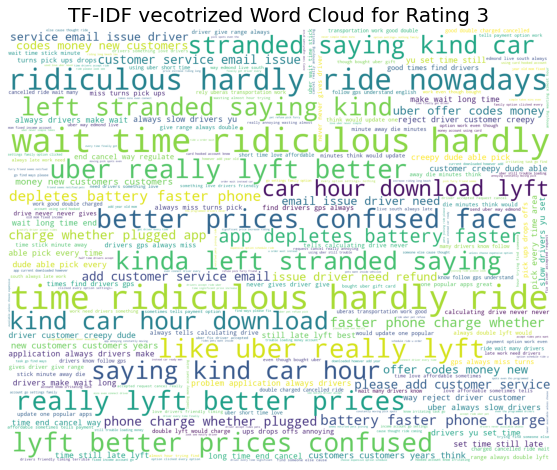

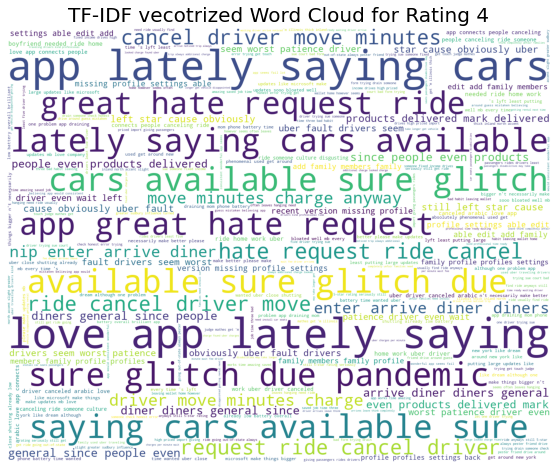

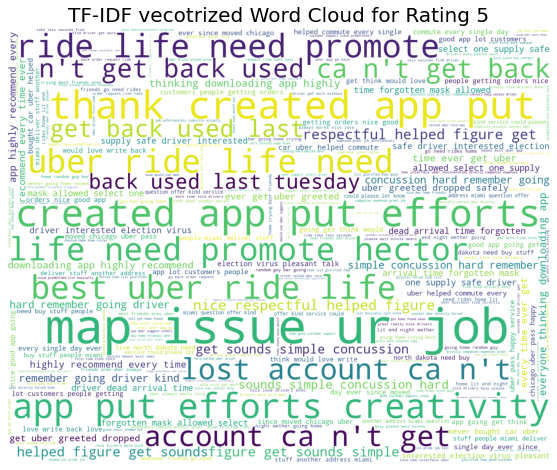

In [42]:
# show word cloud for each rating - tf-idf 
for i in range(0,len(tfidf_word_cloud)):
    plt.figure(figsize=(12,8))
    plt.imshow(tfidf_word_cloud[i])
    plt.axis('off')
    plt.title(f"TF-IDF vecotrized Word Cloud for Rating {i+1}",fontsize=20)
   